In [1]:
!pip install joblib
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [2]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import opendatasets as od
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import seaborn as sns

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
od.download("https://www.kaggle.com/datasets/gonzajl/tumores-cerebrales-mri-dataset")

df = pd.read_csv("datos.csv")

Skipping, found downloaded files in "./tumores-cerebrales-mri-dataset" (use force=True to force download)


In [4]:
df.imagen.shape

(44000,)

In [5]:
df.imagen[0]

'./tumores-cerebrales-mri-dataset/glioma/G_1.jpg'

In [6]:
columnas = df.columns
clases = [col for col in columnas if col != "imagen"]

print("Clases existentes en el CSV:")
for clase in clases:
    print(clase)

Clases existentes en el CSV:
glioma
meningioma
pituitary
no_tumor


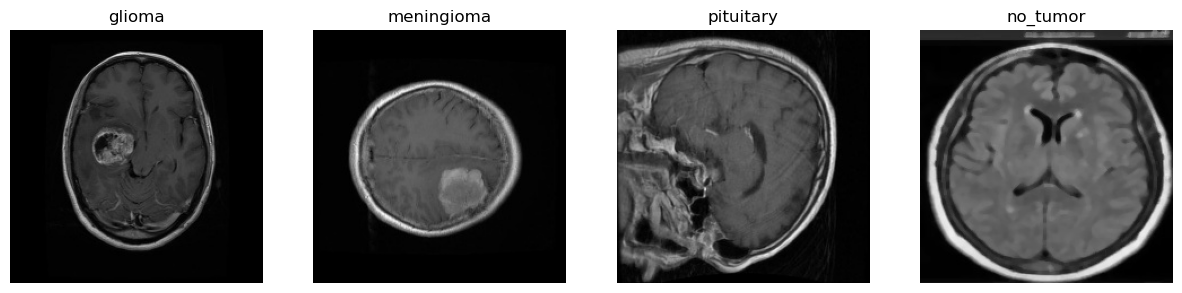

In [7]:
# Obtener las clases disponibles (todas las columnas excepto 'imagen')
clases = list(df.columns[1:])

# Crear una figura para mostrar las imágenes de ejemplo
fig = plt.figure(figsize=(15, 5))

for i, clase in enumerate(clases):
    filas_clase = df[df[clase] == 1]
    
    if not filas_clase.empty:
        fila_ejemplo = filas_clase.sample()
        direccion_imagen = fila_ejemplo["imagen"].values[0]
        
        imagen = cv2.imread(direccion_imagen)
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        
        ax = fig.add_subplot(1, len(clases), i + 1)
        ax.set_title(clase)
        ax.imshow(imagen_rgb)
        ax.axis('off')

plt.show()

Precisión del modelo SVM: 0.9613636363636363


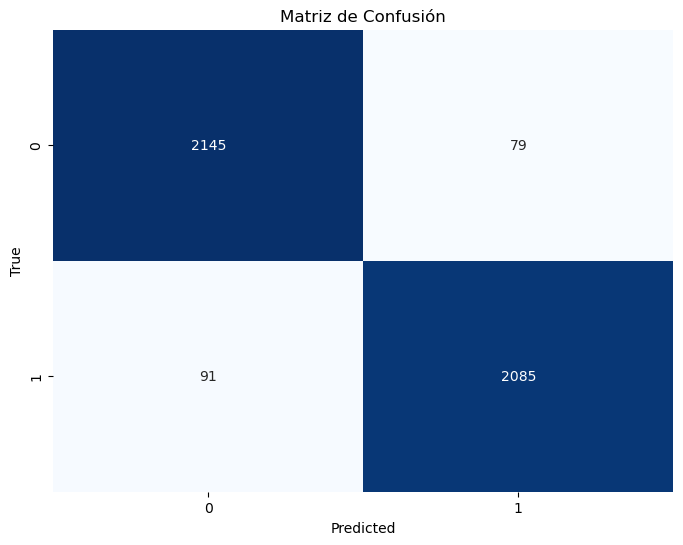


Métricas por Clase:
              precision    recall  f1-score   support

    no_tumor       0.96      0.96      0.96      2224
      glioma       0.96      0.96      0.96      2176

    accuracy                           0.96      4400
   macro avg       0.96      0.96      0.96      4400
weighted avg       0.96      0.96      0.96      4400



['modelo_glioma.pkl']

In [8]:
# Preparo las imagenes para el modelo SVM de glioma o no_tumor
# Preparo listas para almacenar imágenes y etiquetas
#Como SVM es inherente un clasificador binario, entonces separo el problema en capas y comparo el resultado de cada solución.
gliomas = []
etiquetas_g = []

# Leer y procesar todas las imágenes
for i, fila in df.iterrows():
    if fila['glioma'] == 1 or fila['no_tumor'] == 1: 
        ruta_imagen = fila['imagen']
        # Leer la imagen desde la ruta
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen_normalizada = (imagen / 255.0 * 255).astype('uint8')
        # Etiqueta según la categoría (glioma o no_tumor)
        gliomas.append(imagen_normalizada.flatten())
        if fila['glioma'] == 1:
            etiquetas_g.append(1)
        elif fila['no_tumor'] == 1:
            etiquetas_g.append(0)
            
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(gliomas, etiquetas_g, test_size=0.2, random_state=123)

# Entrenar un modelo SVM
svm_model_glioma = SVC(kernel='linear')
svm_model_glioma.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model_glioma.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", precision)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()
# Obtener las métricas por clase
classification_rep = classification_report(y_test, y_pred, target_names=["no_tumor", "glioma"])

# Mostrar las métricas por clase
print("\nMétricas por Clase:")
print(classification_rep)

joblib.dump(svm_model_glioma, 'modelo_glioma.pkl')

Precisión del modelo SVM: 0.9563636363636364


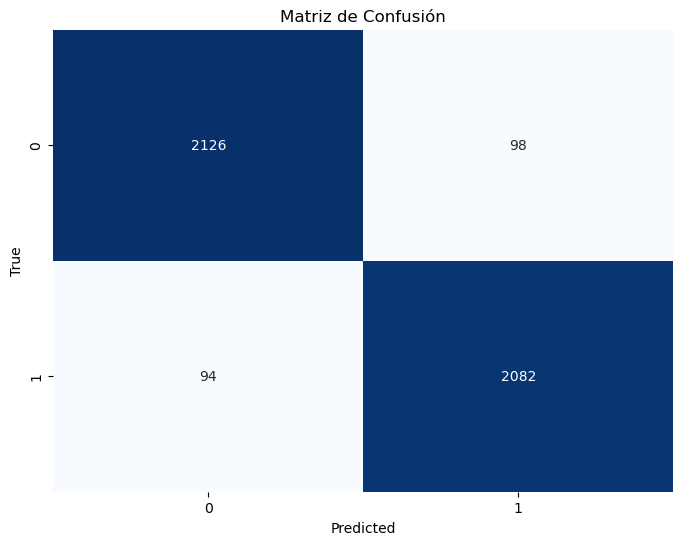


Métricas por Clase:
              precision    recall  f1-score   support

    no_tumor       0.96      0.96      0.96      2224
  meningioma       0.96      0.96      0.96      2176

    accuracy                           0.96      4400
   macro avg       0.96      0.96      0.96      4400
weighted avg       0.96      0.96      0.96      4400



['modelo_menignioma.pkl']

In [9]:
# Preparo las imagenes para el modelo SVM de meningioma o no_tumor
# Preparo listas para almacenar imágenes y etiquetas
#Como SVM es inherente un clasificador binario, entonces separo el problema en capas y comparo el resultado de cada solución.
meningiomas = []
etiquetas_m = []

# Leer y procesar todas las imágenes
for i, fila in df.iterrows():
    if fila['meningioma'] == 1 or fila['no_tumor'] == 1: 
        ruta_imagen = fila['imagen']
        # Leer la imagen desde la ruta
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen_normalizada = (imagen / 255.0 * 255).astype('uint8')
        # Etiqueta según la categoría (meningioma o no_tumor)
        meningiomas.append(imagen_normalizada.flatten())
        if fila['meningioma'] == 1:
            etiquetas_m.append(1)
        elif fila['no_tumor'] == 1:
            etiquetas_m.append(0)
            
X_train, X_test, y_train, y_test = train_test_split(meningiomas, etiquetas_m, test_size=0.2, random_state=123)

# Entrenar un modelo SVM
svm_model_menignioma = SVC(kernel='linear')
svm_model_menignioma.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model_menignioma.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", precision)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()
# Obtener las métricas por clase
classification_rep = classification_report(y_test, y_pred, target_names=["no_tumor", "meningioma"])

# Mostrar las métricas por clase
print("\nMétricas por Clase:")
print(classification_rep)

joblib.dump(svm_model_menignioma, 'modelo_menignioma.pkl')

Precisión del modelo SVM: 0.9865909090909091


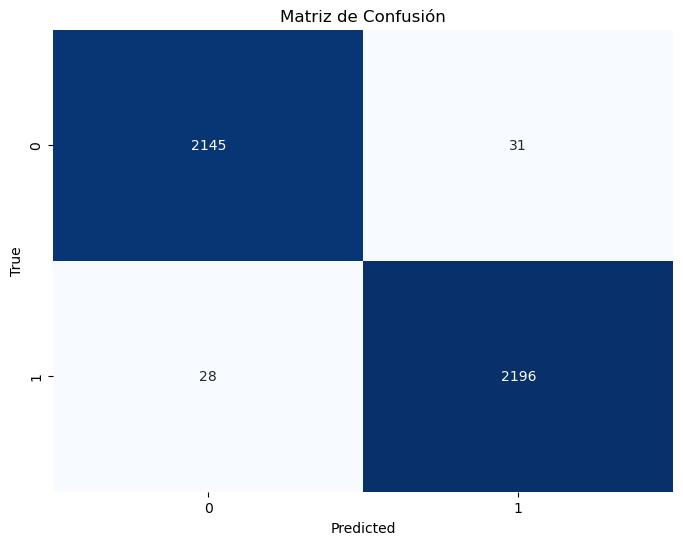


Métricas por Clase:
              precision    recall  f1-score   support

    no_tumor       0.99      0.99      0.99      2176
   pituitary       0.99      0.99      0.99      2224

    accuracy                           0.99      4400
   macro avg       0.99      0.99      0.99      4400
weighted avg       0.99      0.99      0.99      4400



['modelo_pituirary.pkl']

In [10]:
# Preparo las imagenes para el modelo SVM de pituitary o no_tumor
# Preparo listas para almacenar imágenes y etiquetas
#Como SVM es inherente un clasificador binario, entonces separo el problema en capas y comparo el resultado de cada solución.
pituitarys = []
etiquetas_p = []

# Leer y procesar todas las imágenes
for i, fila in df.iterrows():
    if fila['pituitary'] == 1 or fila['no_tumor'] == 1: 
        ruta_imagen = fila['imagen']
        # Leer la imagen desde la ruta
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen_normalizada = (imagen / 255.0 * 255).astype('uint8')
        # Etiqueta según la categoría (pituitary o no_tumor)
        pituitarys.append(imagen_normalizada.flatten())
        if fila['pituitary'] == 1:
            etiquetas_p.append(1)
        elif fila['no_tumor'] == 1:
            etiquetas_p.append(0)

X_train, X_test, y_train, y_test = train_test_split(pituitarys, etiquetas_p, test_size=0.2, random_state=123)

# Entrenar un modelo SVM
svm_model_pituitary = SVC(kernel='linear')
svm_model_pituitary.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model_pituitary.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", precision)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()
# Obtener las métricas por clase
classification_rep = classification_report(y_test, y_pred, target_names=["no_tumor", "pituitary"])

# Mostrar las métricas por clase
print("\nMétricas por Clase:")
print(classification_rep)

joblib.dump(svm_model_pituitary, 'modelo_pituirary.pkl')

In [11]:
#Como Gonza es un capo e hizo muy bien el laburo de subir y aumentar los datos de las imágenes, no
#es necesario realizarle un procesado a las imágenes de más.

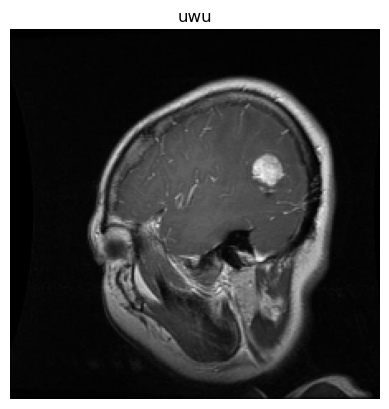

Clase Final: glioma
Decisión Glioma: 1
Decisión Meningioma: 0
Decisión Pituitary: 1


In [5]:
#Test de predicción
modelo_glioma = joblib.load('modelo_glioma.pkl')
modelo_meningioma = joblib.load('modelo_menignioma.pkl')
modelo_pituitary = joblib.load('modelo_pituirary.pkl')

ruta_image = "G_3.jpg"
imagen = cv2.imread(ruta_image, cv2.IMREAD_GRAYSCALE)
imagen_normalizada = (imagen / 255.0 * 255).astype('uint8')
imagen_redimensionada = cv2.resize(imagen_normalizada, (224, 224))
# Mostrar la imagen
plt.imshow(imagen_redimensionada, cmap='gray')  # Utiliza cmap='gray' para mostrar en escala de grises
plt.axis('off')
plt.show()

# Realizar la clasificación con cada modelo SVM
decision_glioma = modelo_glioma.predict([imagen_redimensionada.flatten()])[0]
decision_meningioma = modelo_meningioma.predict([imagen_redimensionada.flatten()])[0]
decision_pituitary = modelo_pituitary.predict([imagen_redimensionada.flatten()])[0]
# Clasificación final
if decision_glioma == 1:
    clase_final = "glioma"
elif decision_meningioma == 1:
    clase_final = "meningioma"
elif decision_pituitary == 1:
    clase_final = "pituitary"
else:
    clase_final = "no tumor"

print("Clase Final:", clase_final)
print("Decisión Glioma:", decision_glioma)
print("Decisión Meningioma:", decision_meningioma)
print("Decisión Pituitary:", decision_pituitary)
